<a id="top"></a>
# Team TS4  Classification Predict Notebook
##### Members: Ntokozo Thumre, Thato  Bogopane  <sup> </sup>
---
<img src="" align="left">  


* [Notebook location]()

* [Trello board](https://trello.com/b/bKiHUpqU/classificationts4dsft21) 

# **Table of contents**
1. [Introduction](#intro)
2. [Data Collection](#data)
3. [Data cleaning and Transformation](#cleaning)
4. [Exploratory Data Analysis](#EDA)
5. [Model Building](#model)
6. [Model Parameter Tuning](#tuning)
7. [Performance Evaluation](#evaluation)
8. [Conclusion](#conclusion)
9. [References](#references) 

<a id="intro"></a>
# 1. Introduction
**EDSA - Climate Change Belief Analysis 2021**

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this in mind, we will create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their historical tweet data.


## comet

Comet is a great tool for version control as it records the parameters,experiments and conditions from each of the experiements- allowing for reproducing of results, or going back to a previous version of the experiment.

<a id="data"></a>
# 2. Data Collection

Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

#### Class Description 

2 - News: the tweet links to factual news about climate change 

1 - Pro: the tweet supports the belief of man-made climate change

0 - Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

-1 - Anti: the tweet does not believe in man-made climate change 

#### Variable definitions 

sentiment: Sentiment of tweet

message: Tweet body 

tweetid: Twitter unique id Files 


In [1]:
#pandas and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

# tweet cleaning and transformation
import nltk
import re
import string
import unidecode
import unicodedata


from collections import Counter
from nltk import bigrams
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, sent_tokenize, FreqDist
from wordcloud import STOPWORDS
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from wordcloud import WordCloud

# training the model
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Asssessing the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

#resampling module
from sklearn.utils import resample

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# comet
import comet_ml

In [2]:
#Read the data
df_train = pd.read_csv('https://raw.githubusercontent.com/Ntokozo19/classification-predict-streamlit-template/master/resources/train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Ntokozo19/classification-predict-streamlit-template/master/resources/test.csv')
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [3]:
df_train.tail()

,sentiment,message,tweetid
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732
15818,0,RT @Chet_Cannon: .@kurteichenwald's 'climate c...,806319


In [4]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


**NB:** Before we do anything to the original dataframe we will make a copy of it so that we always have the original dataframe when we need to reference it. We will then do our cleaning and preprocessing on the copy and use the original as a reference.

In [5]:
df_all = df_train.copy()


<a id="cleaning"></a>
# 3. Data cleaning and Transformation

### 3.1 Cleaning out Null values

In [6]:
df_test.isnull().sum() # checking for null values on our test dataset

message    0
tweetid    0
dtype: int64

In [7]:
df_all.isnull().sum() # checking for null values on our train dataset

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values to clean out.

### 3.2 Sentiment cleaning

This function turns the sentiment codes into actual words which will make it easier for us to explore and visaulise the data going forward.

In [8]:
def clean_sentiment(df):  
    """This function turns the sentiment codes into actual words which will make it easier for us to see"""
    
    # creating a empty list for storage 
    sentiment_list = []
    
    # Going through each sentiment and changing them accordingly, this is what this loop and the if statements do.
    for number in df['sentiment'] :
        
        if number == 1 :
            sentiment_list.append('Pro')
            
        elif number == 0 :
            sentiment_list.append('Neutral')
            
        elif number == -1 :
            sentiment_list.append('Anti')
            
        else :
            sentiment_list.append('News')
            
    # putting our sentiments in the column named 'sentiment' to our dataframe
    df_all['sentiment'] = sentiment_list
    
    return df

In [9]:
clean_sentiment(df_all)

,sentiment,message,tweetid
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221
1,Pro,It's not like we lack evidence of anthropogeni...,126103
2,News,RT @RawStory: Researchers say we have three ye...,698562
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001
15815,News,RT @washingtonpost: How climate change could b...,17856
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732


### 3.3.1 Tweet cleaning

We clean our tweet data by removing all the noise, that is, removing all the urls, hashtags, mentions, puntuation and making all the text lowercase. This function will remove hashtags therefore we will start by making a copy of all the hashtags and mentions in order to analyse them seperately later.



In [10]:
def hashtag_extract(tweet):  
    """Helper function to extract hashtags"""
    # creating a empty list for storage where we will keep our Hashtags later
    hashtags = []
    
    # Going through each tweet and looking for each hashtag and appending the Hashtags in our empty list hashtags
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    
    # finding the sum of the elements in the list hashtag
    hashtags = sum(hashtags, [])
    
    # creating a dictionary with tokens from the list hashtags into a dictionary, where the keys are the frequency and the values is the frequency
    frequency = nltk.FreqDist(hashtags)
    
    # creating a dataframe from the dictionary to keep track of the word and the frequency
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                           'count': list(frequency.values())})
    
    # method is used to get n largest values from a dataframe 
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df


#Extracting the hashtags for the pro sentiment tweets 
pro = hashtag_extract(df_all['message'][df_all['sentiment'] == 'Pro'])

#Extracting the hashtags for the Anti sentiment tweets
anti = hashtag_extract(df_all['message'][df_all['sentiment'] == 'Anti'])

#Extracting the hashtags for the Neutral sentiment tweets
neutral = hashtag_extract(df_all['message'][df_all['sentiment'] == 'Neutral'])

#Extracting the hashtags for the News sentiment tweets
news = hashtag_extract(df_all['message'][df_all['sentiment'] == "News"])


#creating a dataframe with all the hashtags and a count for each sentiment
df_hashtags = pro.merge(anti,on='hashtag',suffixes=('_pro', '_anti'), how = 'outer').merge(neutral,on='hashtag', how = 'outer').merge(news,on='hashtag', suffixes = ('_neutral', '_news'), how = 'outer')
df_hashtags


,hashtag,count_pro,count_anti,count_neutral,count_news
0,climate,187.0,10.0,16.0,130.0
1,BeforeTheFlood,129.0,NaN,4.0,NaN
2,climatechange,94.0,6.0,11.0,42.0
3,ImVotingBecause,62.0,NaN,NaN,NaN
4,COP22,59.0,NaN,3.0,13.0
5,ParisAgreement,50.0,4.0,NaN,9.0
6,ActOnClimate,42.0,NaN,NaN,NaN
7,Ã,37.0,NaN,NaN,NaN
8,Trump,34.0,7.0,11.0,25.0
9,IVotedBecause,33.0,NaN,NaN,NaN


We will use this table later in our analysis

#### Extracting Mentions

In [11]:
# Separate joined words based on capitals
def camel_case_split(identifier):
    
    matches = re.finditer(
        r'.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)',
        identifier
    )
    return " ".join([m.group(0) for m in matches])

# Extract Mentions
def extract_mentions(tweet):
    
  """Helper function to extract mentions"""
  mentions = re.findall(r'@([a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14})', tweet)
    
  return mentions

#Applying the function on the dataframe
df_all['mentions'] = df_all['message'].apply(extract_mentions)
df_all

,sentiment,message,tweetid,mentions
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[mashable]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[]
2,News,RT @RawStory: Researchers say we have three ye...,698562,[RawStory]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[SoyNovioDeTodas]
...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,[ezlusztig]
15815,News,RT @washingtonpost: How climate change could b...,17856,[washingtonpost]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[]
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,[sara8smiles]


##### Putting the mentions in their respective list so we can plot some graphs later.

In [12]:
# Create a list of all the mentions
mentions_list = [item for new_list in df_all['mentions'] for item in new_list]

# Grouping mentions by sentiment
# News Mentions
news_mentions = df_all[df_all['sentiment'] == 'News']['mentions']
news_mentions = [x for x in news_mentions if x != []]
news_mentions = [item for new_list in news_mentions for item in new_list]

# Positive Mentions
pos_mentions = df_all[df_all['sentiment'] == 'Pro']['mentions']
pos_mentions = [x for x in pos_mentions if x != []]
pos_mentions = [item for new_list in pos_mentions for item in new_list]

# Neutral Mentions
neutral_mentions =df_all[df_all['sentiment'] == 'Neutral']['mentions']
neutral_mentions = [x for x in neutral_mentions if x != []]
neutral_mentions = [item for new_list in neutral_mentions for item in new_list]

# Negative Mentions
neg_mentions = df_all[df_all['sentiment'] == 'Anti']['mentions']
neg_mentions = [x for x in neg_mentions if x != []]
neg_mentions = [item for new_list in neg_mentions for item in new_list]

### 3.3.2 Cleaning the tweets

When it comes to the english language, we use a lot of contractions (e.g it's instead of it is) which are determined by removing some letters and replacing them with an apostrophe. During our cleaning process we will be removing the puntuation which will also remove the apostrophe's in contractions therefore changing the meaning of these words. So, we will create a function that will look up the well known contractions and replace them with the full word. This will also assist when we apply ngram.
When it comes to social media, people also use popular short hand words in place of the full words e.g (lol instead of laugh out load or idk instead of I dont know). We want our model to be able to capture these words and their true meaning instead of capturing random letters.
So we will add the well known short hand words in our dictionary aswell.


In [13]:
#URLs,Hashtags,Mentions,Reserved words (RT, FAV),Emojis,Smileys and make everything lowercase

#Removing RT ftom tweets
df_all['message'] = df_all['message'].str.strip('rt ')

df_test['message'] = df_test['message'].str.strip('rt ')

# Remove @ mentions
pattern = r"@[\w]+" # pattern to remove

pattern = r"@[\w]+" # pattern to remove

sub = r'' # replace it with with an empty space 

#transforming our dataframe 
df_all['message'] = df_all['message'].replace(to_replace = pattern, value = sub, regex = True)

#transforming our dataframe 
df_test['message'] = df_test['message'].replace(to_replace = pattern, value = sub, regex = True) 

df_all

,sentiment,message,tweetid,mentions
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[mashable]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[]
2,News,RT : Researchers say we have three years to ac...,698562,[RawStory]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[]
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,[SoyNovioDeTodas]
...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,[ezlusztig]
15815,News,RT : How climate change could be breaking up a...,17856,[washingtonpost]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[]
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,[sara8smiles]


In [14]:
#Function used to lookup shortwords from the dictionary
def lookup_dict(text, dictionary):
    
    for word in text.split(): 
        
        if word.lower() in dictionary:
            
            if word.lower() in text.split():
                
                text = text.replace(word, dictionary[word.lower()]) 
    return text

In [15]:
#create a dictionary of contractions as the keys and its full word representation as the values
short_and_contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"8yo":"eight year old",
"brb" : "be right back"    
}


#Apply a lambda function to look up every word in the tweets and replace it with the full word

#apply this to a new column so that we can see the difference
df_all['clean_message'] = df_all['message'].apply(lambda x: lookup_dict(x,short_and_contractions))

df_test['clean_message'] = df_test['message'].apply(lambda x: lookup_dict(x,short_and_contractions))

df_all

,sentiment,message,tweetid,mentions,clean_message
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[mashable],PolySciMajor EPA chief does not think carbon d...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[],It's not like we lack evidence of anthropogeni...
2,News,RT : Researchers say we have three years to ac...,698562,[RawStory],RT : Researchers say we have three years to ac...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[],#TodayinMaker# WIRED : 2016 was a pivotal year...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,[SoyNovioDeTodas],"RT : It's 2016, and a racist, sexist, climate ..."
...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,[ezlusztig],RT : They took down the material on global war...
15815,News,RT : How climate change could be breaking up a...,17856,[washingtonpost],RT : How climate change could be breaking up a...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[],notiven: RT: nytimesworld :What does Trump act...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,[sara8smiles],RT : Hey liberals the climate change crap is a...


In [16]:
df_test

,message,tweetid,clean_message
0,Europe will now be looking to China to make su...,169760,Europe will now be looking to China to make su...
1,Combine this with the polling of staffers re c...,35326,Combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,"The scary, unimpeachable evidence that climate..."
3,\nPutin got to you too Jill ! \nTrump does...,476263,\nPutin got to you too Jill ! \nTrump does...
4,RT : 'Female orgasms cause global warming!'\n-...,872928,RT : 'Female orgasms cause global warming!'\n-...
...,...,...,...
10541,"RT : Brb, writing a poem about climate change....",895714,"RT : Brb, writing a poem about climate change...."
10542,2016: the year climate change came home: Durin...,875167,2016: the year climate change came home: Durin...
10543,RT : Pacific countries positive about Fiji lea...,78329,RT : Pacific countries positive about Fiji lea...
10544,"RT : You’re so hot, you must be the cause for ...",867455,"RT : You’re so hot, you must be the cause for ..."


As you can see, the word doesn't has been changed to does not therefore this word will not be afftected by our 'remove puntuation' steps

In [17]:
"""This function is to strip accent letter those special characters then return a normal alphabet"""
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [18]:
# applying the function on our training data
df_all['clean_message'] = df_all['clean_message'].apply(strip_accents) 

# applying the function on our testing data
df_all['clean_message'] = df_all['clean_message'].apply(strip_accents)

In [19]:
def clean_text(text):
    """This function is to clean the data removing urls, punctuations, spaces and making text to be lowercase """
    
    URL = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    text = re.sub(URL, '', text)
    
    text = text.lower() # making text to be lowercase 
      
    text =re.sub("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text) # removing all punctuation with no space
    
    text =re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text) # removing all punctuation with a space
    
    text = re.sub("\\s+", " ", text)  # Remove extra whitespace
       
    text = re.sub(r"U+FFFD ", ' ', text) # Remove that funny diamond
    
    text = text.lstrip()  # removes whitespaces before string
    
    text = text.rstrip()  # removes whitespaces after string
    
    return text

df_all['clean_message'] = df_all['clean_message'].apply(clean_text)

df_test['clean_message'] = df_test['clean_message'].apply(clean_text)

df_all


,sentiment,message,tweetid,mentions,clean_message
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[mashable],polyscimajor epa chief does not think carbon d...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[],its not like we lack evidence of anthropogenic...
2,News,RT : Researchers say we have three years to ac...,698562,[RawStory],rt researchers say we have three years to act ...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[],#todayinmaker# wired 2016 was a pivotal year i...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,[SoyNovioDeTodas],rt its 2016 and a racist sexist climate change...
...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,[ezlusztig],rt they took down the material on global warmi...
15815,News,RT : How climate change could be breaking up a...,17856,[washingtonpost],rt how climate change could be breaking up a 2...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[],notiven rt nytimesworld what does trump actual...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,[sara8smiles],rt hey liberals the climate change crap is a h...


In [20]:
df_test

,message,tweetid,clean_message
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,\nPutin got to you too Jill ! \nTrump does...,476263,putin got to you too jill trump does not belie...
4,RT : 'Female orgasms cause global warming!'\n-...,872928,rt female orgasms cause global warming sarcast...
...,...,...,...
10541,"RT : Brb, writing a poem about climate change....",895714,rt brb writing a poem about climate change #cl...
10542,2016: the year climate change came home: Durin...,875167,2016 the year climate change came home during ...
10543,RT : Pacific countries positive about Fiji lea...,78329,rt pacific countries positive about fiji leadi...
10544,"RT : You’re so hot, you must be the cause for ...",867455,rt you’re so hot you must be the cause for glo...


Second round cleaning since we saw some of the characters were not removed.

In [21]:

# removing punctuations on our training dataset
df_all['clean_message'] = df_all['clean_message'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

# removing punctuations on our testing dataset
df_test['clean_message'] = df_test['clean_message'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

df_all

,sentiment,message,tweetid,mentions,clean_message
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[mashable],polyscimajor epa chief does not think carbon d...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[],its not like we lack evidence of anthropogenic...
2,News,RT : Researchers say we have three years to ac...,698562,[RawStory],rt researchers say we have three years to act ...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[],todayinmaker wired 2016 was a pivotal year in ...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,[SoyNovioDeTodas],rt its 2016 and a racist sexist climate change...
...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,[ezlusztig],rt they took down the material on global warmi...
15815,News,RT : How climate change could be breaking up a...,17856,[washingtonpost],rt how climate change could be breaking up a 2...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[],notiven rt nytimesworld what does trump actual...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,[sara8smiles],rt hey liberals the climate change crap is a h...


In [22]:
df_test

,message,tweetid,clean_message
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,\nPutin got to you too Jill ! \nTrump does...,476263,putin got to you too jill trump does not belie...
4,RT : 'Female orgasms cause global warming!'\n-...,872928,rt female orgasms cause global warming sarcast...
...,...,...,...
10541,"RT : Brb, writing a poem about climate change....",895714,rt brb writing a poem about climate change cli...
10542,2016: the year climate change came home: Durin...,875167,2016 the year climate change came home during ...
10543,RT : Pacific countries positive about Fiji lea...,78329,rt pacific countries positive about fiji leadi...
10544,"RT : You’re so hot, you must be the cause for ...",867455,rt you’re so hot you must be the cause for glo...


### 3.3.3 Transform the Tweets

We will now tokenise our tweets, tag them to their parts of speech and lemmetize them.


#### Tokenize

In [23]:
#start by tokenizing the tweets
tokeniser = TreebankWordTokenizer()

# transforming the data using the Treebankword tokenizer
df_all['tokenized'] = df_all['clean_message'].apply(tokeniser.tokenize)

df_all

,sentiment,message,tweetid,mentions,clean_message,tokenized
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,[mashable],polyscimajor epa chief does not think carbon d...,"[polyscimajor, epa, chief, does, not, think, c..."
1,Pro,It's not like we lack evidence of anthropogeni...,126103,[],its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr..."
2,News,RT : Researchers say we have three years to ac...,698562,[RawStory],rt researchers say we have three years to act ...,"[rt, researchers, say, we, have, three, years,..."
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[],todayinmaker wired 2016 was a pivotal year in ...,"[todayinmaker, wired, 2016, was, a, pivotal, y..."
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,[SoyNovioDeTodas],rt its 2016 and a racist sexist climate change...,"[rt, its, 2016, and, a, racist, sexist, climat..."
...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,[ezlusztig],rt they took down the material on global warmi...,"[rt, they, took, down, the, material, on, glob..."
15815,News,RT : How climate change could be breaking up a...,17856,[washingtonpost],rt how climate change could be breaking up a 2...,"[rt, how, climate, change, could, be, breaking..."
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,[],notiven rt nytimesworld what does trump actual...,"[notiven, rt, nytimesworld, what, does, trump,..."
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,[sara8smiles],rt hey liberals the climate change crap is a h...,"[rt, hey, liberals, the, climate, change, crap..."


#### Parts of Speech tagging

Part of Speech Tags are useful for building parse trees, which are used in building named entity recognition (most named entities are Nouns) and extracting relations between words. POS Tagging is also essential for building lemmatizers which are used to reduce a word to its root form.

In [24]:
# converting the column clean_message in the dataframe into a list
texts = df_all['clean_message'].tolist()

# tagging the tweets
tagged_texts = pos_tag_sents(map(word_tokenize, texts))
df_all['POS'] = tagged_texts

""" this function indentifies the parts of speech Noun, Adjective, Verb and Adverb """
def get_wordnet_pos(tag):
    
    
    if tag.startswith('J'):
        return wordnet.ADJ

    elif tag.startswith('V'):
        return wordnet.VERB

    elif tag.startswith('N'):
        return wordnet.NOUN

    elif tag.startswith('R'):
        return wordnet.ADV
    
    else:
        return wordnet.NOUN

In [ ]:
# transforming the data with the function we created
df_all['POS'] = df_all['POS'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_all

#### Lemmatize

In [ ]:
# initialising our lemmatizer
lemmatizer = WordNetLemmatizer()

# applying lemmatization to the POS column
df_all['lemmatized'] = df_all['POS'].apply(lambda x: [lemmatizer.lemmatize(word, tag) for word, tag in x])

# joining the tokenised words after they have been lemmatized
df_all['lemmatized'] = [' '.join(map(str, l)) for l in df_all['lemmatized']]

df_all

<a id="EDA"></a>
# 4. Exploratory Data Analysis

### 4.1 Sentiment Distribution
We can get a lot of insight from our data by exploring the distibution of our sentiments in our dataset.

In [ ]:
# creating a list for the names of each section of the pie
labels=['Pro', 'News', 'Neutral', 'Anti'] 

plt.pie(df_all['sentiment'].value_counts(),
            labels=labels,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1), radius = 2)

plt.show()

As we can see the majority of our data (54%) lies in the pro climate change group where only 8% of our data represents the tweets that are anti climate change. 15% percent of our tweets represent people that are neutral and and 23% of the tweets are news tweets about climate change.

### 4.2 Tweet length distribution

It would also be interesting to look at the length of the tweets for each sentiment, which sentiment writes the longest or the shortest tweets.

In [495]:
# Finding Number of Words per Tweet from the lemmatized words
df_all["num_words"] = df_all["lemmatized"].apply(lambda x: len(str(x).split()))


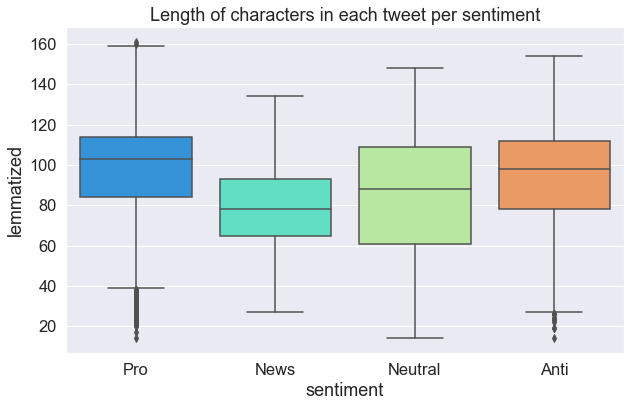

In [496]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x=df_all['sentiment'], y=df_all['lemmatized'].str.len(), data=df_all, palette=("rainbow"), ax=ax)

# title of the boxplot
plt.title('Length of characters in each tweet per sentiment')

# showing the plot
plt.show()

From the above we can see that the tweets that represent the pro climate change group are generally longer than the other sentiments, meaning people that are pro climate change group write longer tweets as compared to the other groups. We can also see that people who are against climate change generally write shorter tweets as compared to the pro and neutral groups and this might suggest that they are only stating opnions with no evidence, or expressing how they feel at that moment. 

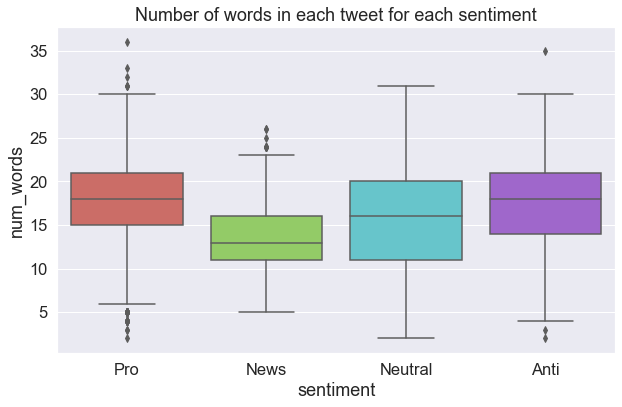

In [497]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment 
sns.boxplot(x='sentiment', y='num_words', data=df_all, palette=("hls"))

# title of the boxplot
plt.title('Number of words in each tweet for each sentiment')

# showing the plot
plt.show()

From the above we can see that the tweets that represent the pro climate change group are generally longer than the other sentiments, as we expected that since they had more characters but also the Neutral climate change group has a bigger distribution than any group meaning most people in this group can have type any number of words which makes it difficult differentiate the groups based on the number of words per tweet and we know that in English each word is made out of 5 letters on average.

### 4.3 Hashtag analysis
Now lets look at the hashtags that were used in the tweets. This will give us an indication of which hashtags each sentiment frequently uses. This could possibly help us tell whether a tweet is Pro or Anti climate change.

We previously extracted the hashtags before cleaning the 'message column', we will now use that dataframe of hashtags in our analysis.

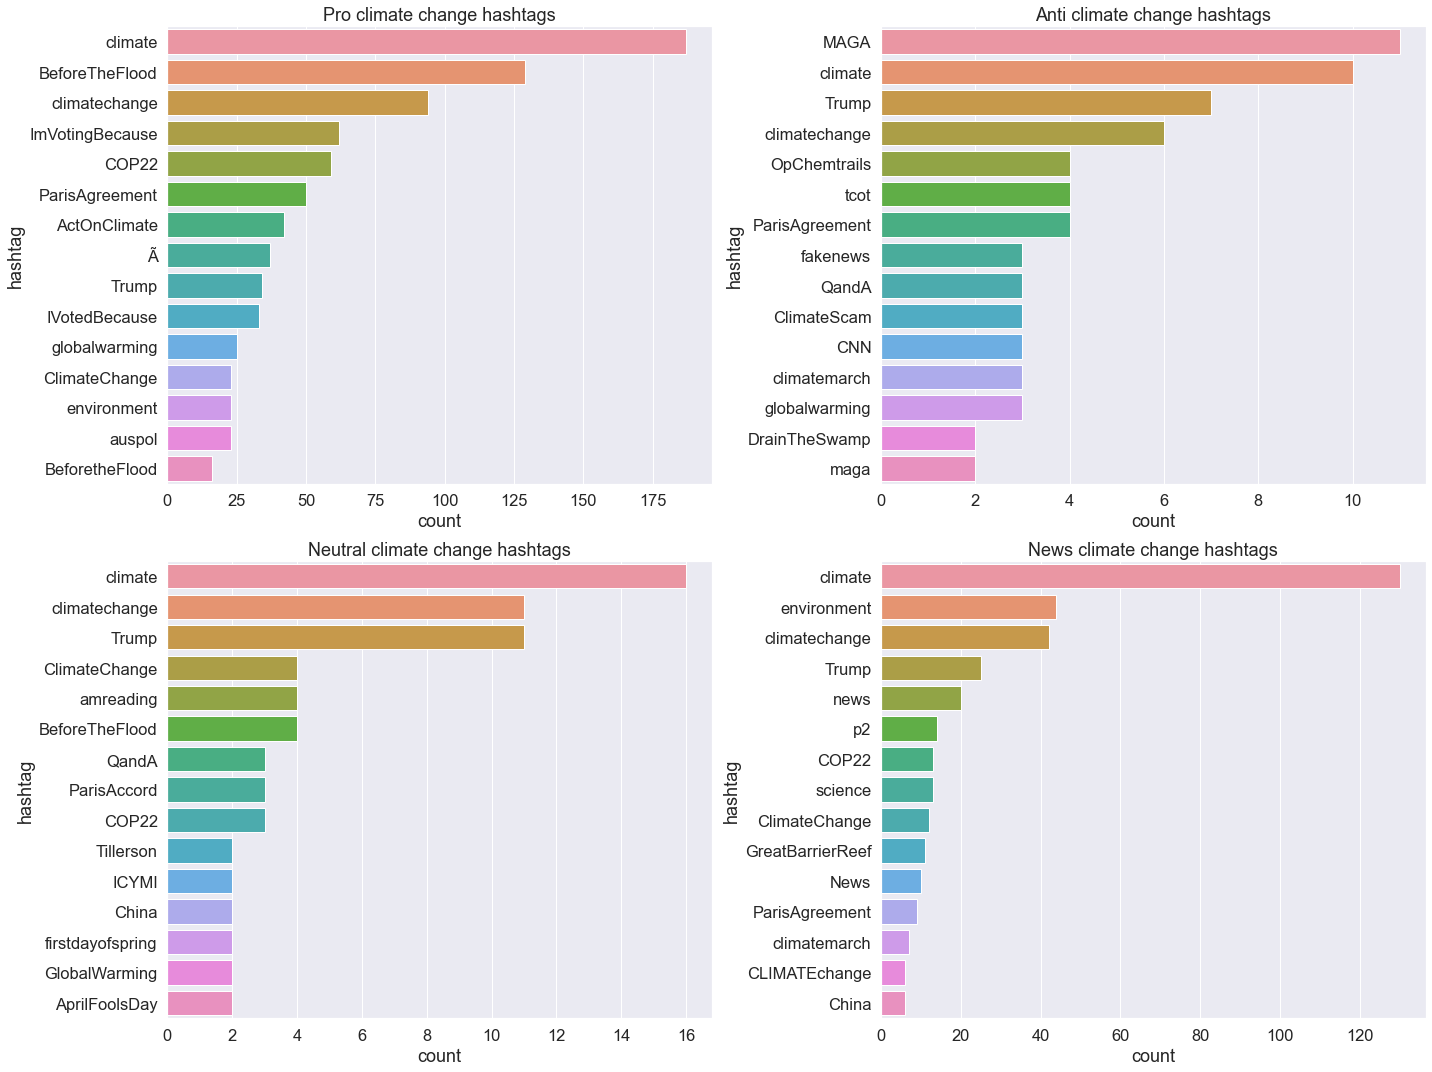

In [498]:
fig, axes = plt.subplots(ncols=2, 
                         nrows=2, 
                         figsize=(20, 15))

sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], ax=axes[0,0]).set(title = 'Pro climate change hashtags')

sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], ax=axes[0,1]).set(title = 'Anti climate change hashtags')

sns.barplot(data=neutral,y=neutral['hashtag'], x=neutral['count'], ax=axes[1,0]).set(title = 'Neutral climate change hashtags')

sns.barplot(data=news,y=news['hashtag'], x=news['count'], ax=axes[1,1]).set(title = 'News climate change hashtags')

plt.tight_layout()

Insights:

_**Pro climate change hashtags:**_


* The most used pro climate change hashtag outside of the #climate is #beforetheflood. This hashtag comes from the documentary named Before the flood where the famous actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions. This documentary created a lot of awareness and education around climate change and the causes of it. It brought, to everyday people's TV screens, the truth about climate change and the true impact it has and will continue to have on the planet if we dont change our way of living. Since this show, many people have jumped on the pro climate change band wagon and have started speaking out, which is what we are seeing with this hashtag.


* Another famous hashtag in the pro climate change hashtags is the #ImVotingBecause. As Americans select their next president, voters share their thoughts as to why they have chosen their candidate with the hashtag #ImVotingBecause. The social media landscape shows that supporters are firm in their convictions and consider this election a historic one. This hashtag also falls under climate change issues because in America climate change has become one of the most important issues in politics and climate change supporters want to vote for a president who views climate change as a priority. Donald Trump was also a president who reversed a lot of work done by climate change advocates around the world.


* Another hashtag that was in the top 5 was the #COP22 which is The 2016 United Nations Climate Change Conference that was an international meeting of political leaders and activists to discuss environmental issues. It was held in Marrakech, Morocco, on 7–18 November 2016. This is where the Trump administration formerly announced their plans to exit the climate change deal. Climate change supporters where not happy with this decision. This also exlains the #Trump which also appears at number 9 of the pro climate change hashshtags.


_**Anti climate change hashtags:**_

* The number hastag used by anti climate changers is #MAGA. "Make America Great Again" or MAGA is a campaign slogan used in American politics popularized by Donald Trump in his successful 2016 presidential campaign. During his presidency Donald trump did not shy away from expressing his anti climate change views and his supporters didnt either. That is why #Trump is also the 3rd most frequently used hashtag in the anti climate change hashtags.


* Hashtags such as #Fakenews, #climatescam, #DrainTheSwamp also made it to the top hashtags and they are all related to anti climate chmage supporters who believe thet climate change is a lie or a scam which is also perpurtuated by Donald Trump. So we can see from all these hashtags that Donald Trump is the biggest leader who is anti climate change and who's supporters are also anti climate change.


* TCOT which stands for Top Conservative On Twitter takes the number 8 spot. The term provides a way for conservatives in particular and Republicans in general to locate and follow the tweets of like-minded individuals. We're sensing a pattern here: Trump, top conservatives on twitter, make America great again, Drain the swamp



_**Neutral climate change hashtags:**_

* In the neutral category, a few of the top hashtags were not directly related to climate change eg. Hashtags like GlobalWarming, AmReading, budget and QandA could suggest that these tweets are made by people who are still undecided on the topic but could be open to discussions and are interested in finding new/more information.

* In general neutral climate change tweets have hashtags that are not as polarized as the anti and pro hashtags.

* America and China are responsible for 40% of the world's carbon emissions and are the most mentioned geopolitical entities in pro climate change tweets, most likely for this reason




_**News climate change hashtags:**_

* The hashtags in the news category are less emotive and aim to bring awareness to high profile topics related to climate change that are or were trending in the news. Examples of such hashtags include News and Science which would be used to indicate that the tweet contains information from a news outlet or a scientific study.

* ParisAgreement, COP22 and Trump are popular hashtags. Trump made headlines when he pulled out of the climate agreement, so it makes sense that these hashtags would be trending in climate change news.

* ClimateMarch - many protests have been held, some even global, to raise awareness about climate change. These protests usually make headlines and are featured on news sites

A natural next step to take is to look at what other words are used in the tweets for each that can give us an indication of the sentiment. We will build word clouds to visualize these.


### 4.4.1 Frequent words Analysis in each sentiment

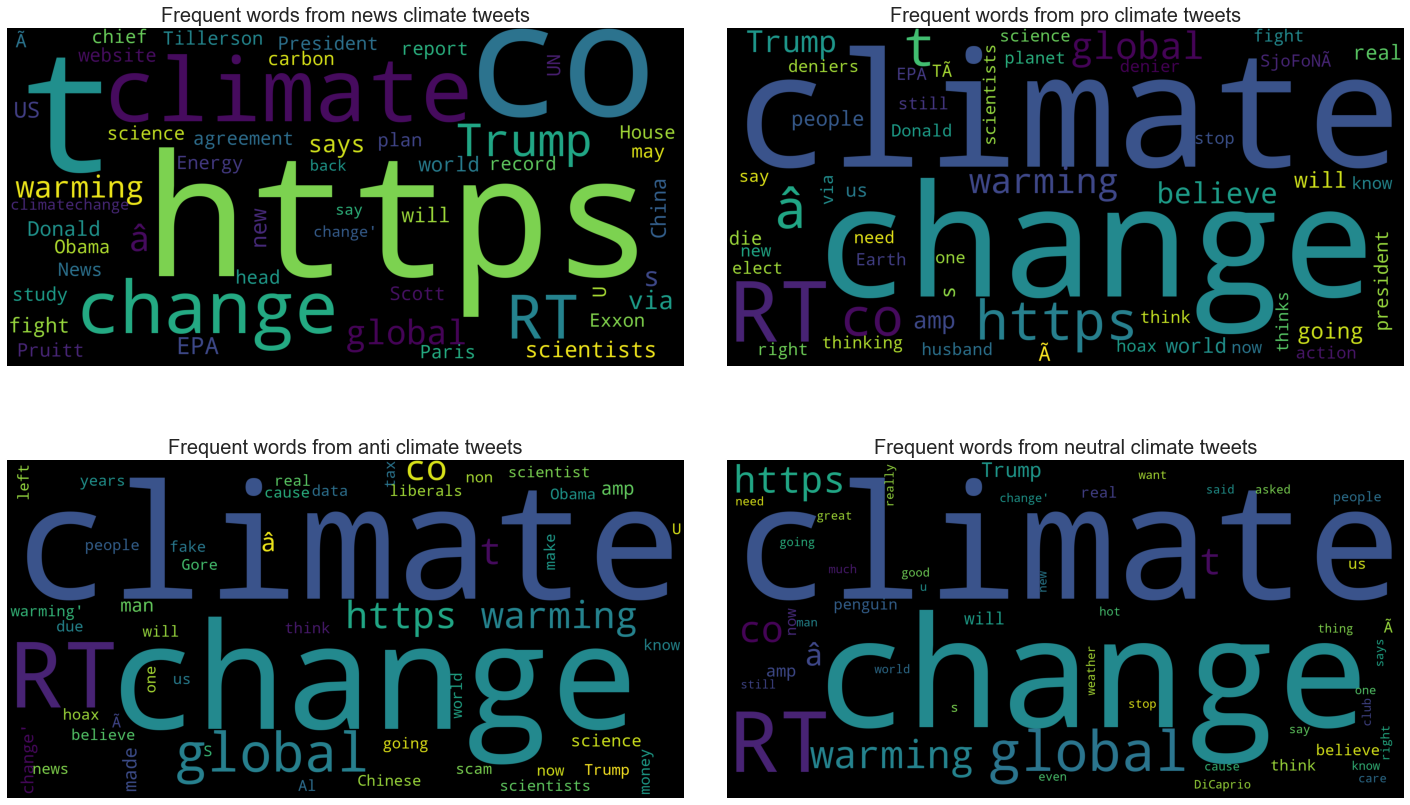

In [499]:
# Plotting word clouds
news = df_all[df_all['sentiment'] == 'News']['message']
pro = df_all[df_all['sentiment'] == 'Pro']['message']
neutral =df_all[df_all['sentiment'] == 'Neutral']['message']
anti = df_all[df_all['sentiment'] == 'Anti']['message']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

news = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


anti = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
# fig.suptitle('Clouds of polar words', fontsize = 30)
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Frequent words from news climate tweets', fontsize = 20)
axs[0, 0].axis('off')
# axs[0, 0].tight_layout(pad = 1)

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Frequent words from pro climate tweets', fontsize = 20)
axs[0, 1].axis('off')
# axs[0, 1].tight_layout(pad = 1)


# axs[1, 0].tight_layout(pad = 1)
axs[1, 0].imshow(anti)
axs[1, 0].set_title('Frequent words from anti climate tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Frequent words from neutral climate tweets', fontsize = 20)
axs[1, 1].axis('off')

# axs[1, 0].tight_layout(pad = 1)
plt.savefig('joint_cloud.png')


From the above word clouds we can see that the words climate change and global warming are the most frequest words across all sentiments which is to be expected. Outside of those words we see the following:



_**Frequent tweets under pro climate change:**_
 
* We see words like believe, combat, fight, real andaction which represent the belief of the pro climate change supporters who belive that climate change is real and that action needs to be taken to stop it. 
* We also see people being mentioned - SenSenders i.e Senitor Senders who is also a public supporter of the climate change movement. We also see Trump as one of the words probably because he was publicly against climate change.
* We also saw that people tweeted about the Environmental Protection Agency(EPA)
* They also like using words like 'know', 'believe', 'think' because they support the belief of man-made climate.




_**Frequent tweets under News climate change:**_

* Scott Morrison the senior minister who went to Sky news and showed how he is in fact a climate change denier and he doesn't do what he says to the public so a lot of people are tweeting about him as he was also discussing how to reposition climate policies.
* We also see that people tweeted about the Environmental Protection Agency(EPA), possible the news wanted to hear the views from the representives from the EPA and We also see Trump as one of the words probably because he was publicly against climate change.
* They also like using words like 'News', 'Study', 'scientists', 'Report', 'Energy', 'record'.




_**Frequent tweets under Neutral climate change:**_
* We also see Trump as one of the words probably because he was publicly against climate change, we also see Leonardo DiCaprio from the documentary Before the flood.
* They also mention a lot about The Amp which is a committee on Climate Change and they want the society to change the perceptions of climate change,and alert people about trusted sources of information, communication methods relating to decarbonising homes, carbon conscious behaviour.
* They also like using words like 'stop', 'need', 'care', 'right', 'cause'.




_**Frequent tweets under Anti climate change:**_
* Mostly like tweeting the word chinese world they saying the world is ran by China and they  believe Chinese control the climate, they always blame someone for it and they believe it is all made so they can mak more money we can see  Barack Obama and Donald Trump being mentioned as they were the presidents of USA.
* They also blame it all to the scientists and  
* They also like using words like 'fake', 'money', 'tax', 'chinese world', 'scam', 'hoax'.


**Overall insights across all wordclouds**

* The most buzzwords across all sentiments are climate change, global warming and rt (retweet). The frequency of rt ( Retweet ) means that a lot of the same information and/or opinions are being shared and viewed by large audiences. This is true for all 4 classes

* 'Trump' is a frequently occuring word in all 4 classes. This is unsurprising given his controversial view on the topic and also Barack Obama is mentioned as he once said 'Climate Change Greatest Threat to Future Generations' so we can see him being mentioned a lot by the Anti group they probably saying he is the cause of this as this group will find anyone to blame for anything.

* Words like real, believe, think, fight, etc. occur frequently in pro climate change tweets. In contrast, anti climate change tweets contain words such as 'hoax', 'scam', 'tax', 'liberal' and 'fake'. There is a stark difference in tone and use of emotive language in these 2 sets of tweets. From this data we could reason that people who are anti climate change believe that global warming is a 'hoax' and feel negatively towards a tax–based approach to slowing global climate change.

* words like 'science' and 'scientist' occur frequently as well which could imply that people are tweeting about scientific studies that support their views on climate change.

* EPA, the United States Environmental Protection Agency is another climate change 'buzzword' that appears frequently across classes.

* https occurs frequently in pro climate change tweets, implying that many links are being shared around the topic of climate change. These could be links to petitions, websites and/or articles related to climate change. Interesting to note: https only occurs in the top 25 words for the pro climate change class. We seeing more links in the news class as they are sharing articles and sources of information than any other group.

### 4.4.2 Frequent words Analysis for all the sentiments combined

We created a visualization of the top 15 words being used in the overall tweets using a bar graph. 

In [25]:
# Removing words that has no relevance to the context (https, RT, CO)
df_all['word_cloud'] = df_all['lemmatized'].str.replace('http\S+|www.\S+', '', case=False)

# Removing common words which appear in all sentiments
remove_words = ['climate', 'change', 'rt', 'global', 'warming', 'donald', 'trump','amp', 'realDonaldTrump', 's','aaa']

# Function to remove common words listed above
def remove_common_words(message):
  pattern = re.compile(r'\b(' + r'|'.join(remove_words) + r')\b\s*')
  message = pattern.sub('', message)
  return message

df_all['word_cloud'] = df_all['word_cloud'].apply(remove_common_words)


# Adding select words to stop words for better analysis on important word frequency
stop = set(stopwords.words('english')) 
stop_words = ["via", "co", "I",'We','The'] + list(stop)

# Removing stop words from the tweets
df_all['word'] = df_all['word_cloud'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_all['word'] = df_all['word'].str.replace(r'[^\w\s]+', '')

# Separating the strings to a list of words
word_list = [word for line in df_all['word'] for word in line.split()]

# Creating a word frequency counter
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(15)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

# Creating a word frequency plot
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, palette="hls")
plt.title('WORD FREQUENCY')
plt.savefig('wordcount_bar.png')


KeyError: 'lemmatized'

from the above bar graph we have removed the most common words we have seen which were appearing most often from the wordclouds words like 'climate change', 'Donald Trump'... 
since we have done the analysis for them and stated possible reasons why they might be appearing more often so we want to see which other words are used when we excluded them.


As we can see that **Believe** is the top word with a frequency above 1000 times which might from here we can't clearly say which group likes using this word but we know it is the most used word in our dataset when we excluded some of the common words we have seen and **real** take the second position in our list which might be a sign that most people are saying climate change is a real thing. And the top 15 words when you remove the obvious ones which were most appearing in most tweets are: Believe, Real, World, Environmental Protection Agency(EPA), People, U as YOU, Make, Fight, Say, Die, Like, New, Scientist, Cause, Go.


### 4.5 Mentions Analysis

## Insights on the mentions

### Bar graph representation of the mention insights 
The numbers below about the mentions convey the same thing as the cluster bar graph below.

In [501]:
mentions =['All', 'Postive', 'Neutral', 'Negative', 'News']

fig = go.Figure(data=[
    go.Bar(name='Total Mentions', x=mentions, y=[14799, 8497, 2198, 1386, 2718],marker_color='lightblue'),
    go.Bar(name='Unique Mentions', x=mentions, y=[7640, 4495, 1880, 919, 1302], marker_color ='purple')
])
# Change the bar mode
fig.update_layout(barmode='group', title = "Distribution of Mentions")

fig.show()

In [502]:
# Get count of total mentions and  total unique mentions
print("Total number of mentions: \t\t\t"+ str(len(mentions_list)))
print("Total number of unique mentions: \t\t"+ str(len(set(mentions_list))))

# Get count of mentions and unique mentions per sentiment
print("Total number of News mentions: \t\t\t"+ str(len(news_mentions)))
print("Total number of unique News mentions: \t\t"+ str(len(set(news_mentions))))

print("Total number of Positve mentions: \t\t"+ str(len(pos_mentions)))
print("Total number of unique Positive mentions: \t"+ str(len(set(pos_mentions))))

print("Total number of Neutral mentions: \t\t"+ str(len(neutral_mentions)))
print("Total number of unique Neutral mentions: \t"+ str(len(set(neutral_mentions))))

print("Total number of Negative mentions: \t\t"+ str(len(neg_mentions)))
print("Total number of unique Negative mentions: \t"+ str(len(set(neg_mentions))))

# Count of common mentions
common_mentions = set(pos_mentions) & set(news_mentions) & set(neg_mentions) & set(neutral_mentions)
print("Total number of Common mentions: \t\t"+ str(len(common_mentions)))

Total number of mentions: 			14799
Total number of unique mentions: 		7640
Total number of News mentions: 			2718
Total number of unique News mentions: 		1302
Total number of Positve mentions: 		8497
Total number of unique Positive mentions: 	4495
Total number of Neutral mentions: 		2198
Total number of unique Neutral mentions: 	1880
Total number of Negative mentions: 		1386
Total number of unique Negative mentions: 	919
Total number of Common mentions: 		39


As you can see that we can tell which sentiment had more mentions and which has most unique mentions so far but we not able to see what the actual mentions were, so for us to visualise that we going to use a word cloud to see the actual mentions for each sentiment .

### wordclouds for the mentions

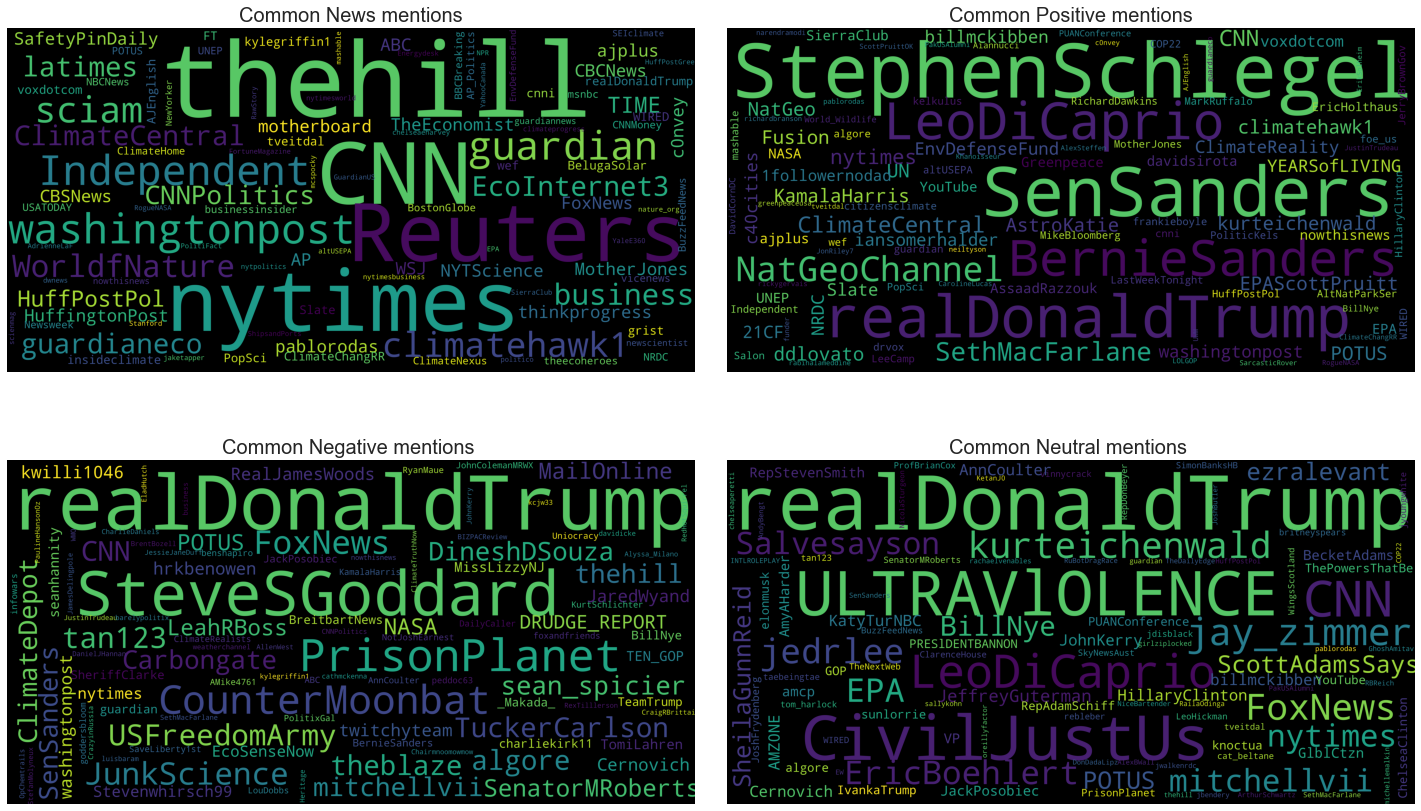

In [503]:
# Extracing rows per sentiment
news = df_all[df_all['sentiment'] == 'News']['mentions']
pos = df_all[df_all['sentiment'] == 'Pro']['mentions']
neutral = df_all[df_all['sentiment'] == 'Neutral']['mentions']
neg = df_all[df_all['sentiment'] =='Anti']['mentions']

# Splitting strings into lists
news = [word for line in news for word in line]
pos = [word for line in pos for word in line]
neutral = [word for line in neutral for word in line]
neg = [word for line in neg for word in line]

# Wordcloud for the News mentions 
news = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

# Wordcloud for the Pro mentions
pos = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pos))

# Wordcloud for the Neutral mentions
neutral = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))

# Wordcloud for the Anti mentions
neg = WordCloud(
    background_color='black',
    max_words=100,
    max_font_size=60, 
    scale=20,
    random_state=42,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neg))

##Creating individual wordclouds for each sentiments title
fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Common News mentions', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pos)
axs[0, 1].set_title('Common Positive mentions', fontsize = 20)
axs[0, 1].axis('off')

axs[1, 0].imshow(neg)
axs[1, 0].set_title('Common Negative mentions ', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Common Neutral mentions ', fontsize = 20)
axs[1, 1].axis('off')

plt.savefig('joint_cloud.png')

From the wordclouds above about the mentions we see the following:

_**Frequent mentions under News climate change:**_





_**Frequent mentions under  climate change:**_








_**Frequent mentions under Neutral climate change:**_








_**Frequent mentions under Anti climate change:**_
    
    
    

#### Bigram Analyis per Sentiment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:3

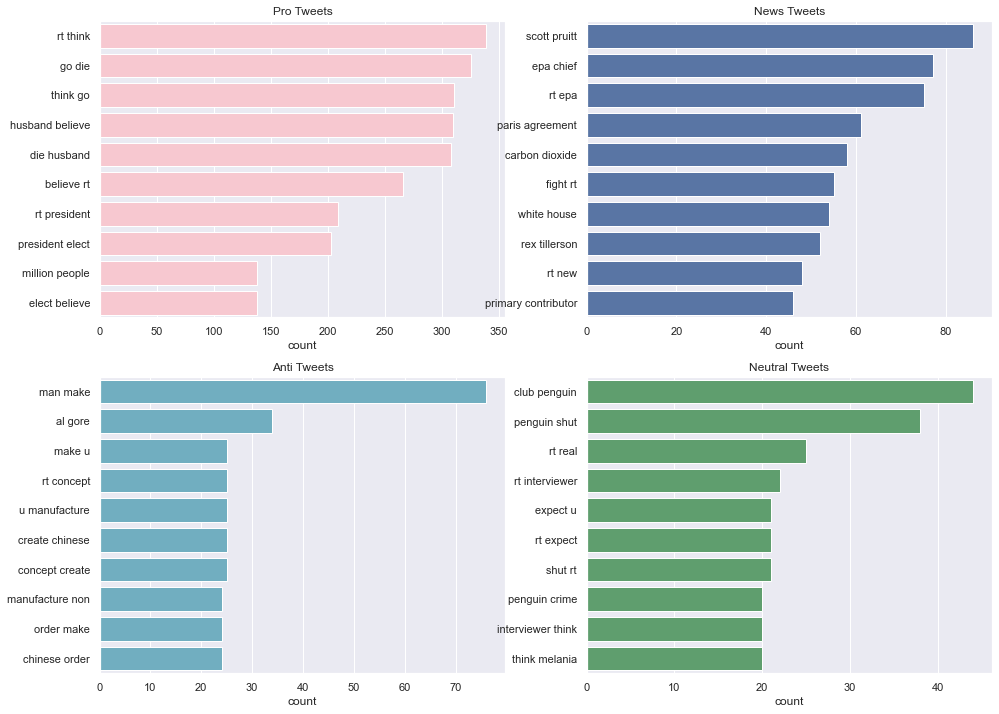

In [504]:
# Make a set of stop words
fig.suptitle('Bigrams in Tweets')
stopwords = set(STOPWORDS)
more_stopwords = {'https','https rt'}
stopwords = stopwords.union(more_stopwords)

# Plot for the Pro sentiment of the bigrams
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
bigram_d = list(
    bigrams(
        [w for w in word_tokenize(' '.join(df_all.loc[df_all.sentiment=='Pro', 'word']).lower()) 
        if (w not in stopwords) & (w.isalpha())]
    )
)

d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count',ascending=False)
sns.barplot(bgdf_d.head(10)['count'], bgdf_d.index[:10], color='pink')
plt.title('Pro Tweets')

# Plot for the News sentiment of the bigrams
plt.subplot(2,2,2)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_all.loc[df_all.sentiment=='News', 'word']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count',ascending=False)
sns.barplot(bgdf_nd.head(10)['count'], bgdf_nd.index[:10], color='b')
plt.title('News Tweets')

# Plot for the Anti sentiment of the bigrams
plt.subplot(2,2,3)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_all.loc[df_all.sentiment=='Anti', 'word']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count',ascending=False)
sns.barplot(bgdf_nd.head(10)['count'], bgdf_nd.index[:10], color='c')
plt.title('Anti Tweets')

# Plot for the Neutral sentiment of the bigrams
plt.subplot(2,2,4)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_all.loc[df_all.sentiment=='Neutral', 'word']).lower()) if 
              (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count',ascending=False)
sns.barplot(bgdf_nd.head(10)['count'], bgdf_nd.index[:10], color='g')
plt.title('Neutral Tweets')
plt.show()

,message,tweetid,clean_message
0,Europe will now be looking to China to make su...,169760,europe will now be looking to china to make su...
1,Combine this with the polling of staffers re c...,35326,combine this with the polling of staffers re c...
2,"The scary, unimpeachable evidence that climate...",224985,the scary unimpeachable evidence that climate ...
3,\nPutin got to you too Jill ! \nTrump does...,476263,putin got to you too jill trump does not belie...
4,RT : 'Female orgasms cause global warming!'\n-...,872928,female orgasms cause global warming sarcastic ...
...,...,...,...
10541,"RT : Brb, writing a poem about climate change....",895714,brb writing a poem about climate change climat...
10542,2016: the year climate change came home: Durin...,875167,2016 the year climate change came home during ...
10543,RT : Pacific countries positive about Fiji lea...,78329,pacific countries positive about fiji leading ...
10544,"RT : You’re so hot, you must be the cause for ...",867455,you’re so hot you must be the cause for global...


# <a id="model"></a>
# 5. Model Building


### Training with imbalanced data

In [507]:
#Splitting features and target variables
X = df_all['message']#X is the features of the cleaned tweets

y = df_all['sentiment'] #Y is the target variable which is the train sentiment

# Splitting the data 90% for training and 10% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

### 5.1 Text feature extraction

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict.

The TFIDFVectorizer (The term frequency-inverse document frequency) is a weight whose value increases proportionally to count, but is inversely proportional to frequency of the word in the corpus.The Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

In [508]:
tfidf = TfidfVectorizer() #Call the TFidfVectorizer

cf= CountVectorizer() #Call the CountVectorizer

### 5.2 Model training

#### 5.2.1 Logistic regression

In [409]:
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=1000) # initilising the model
  
clf_lr = Pipeline([('tfidf', tfidf), ('clf', lr)]) # Create a pipeline

clf_lr.fit(X_train, y_train) # Fit the training data to the pipeline

y_pred_lr= clf_lr.predict(X_test) # Make predictions

print('accuracy %s' % accuracy_score(y_pred_lr, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_lr,average='weighted')) # Print the weighted f1 score

print(classification_report(y_test, y_pred_lr)) # Print out the classification report

accuracy 0.6946902654867256
f1_score 0.6999027405697757
              precision    recall  f1-score   support

        Anti       0.48      0.66      0.56       126
     Neutral       0.49      0.55      0.52       224
        News       0.65      0.87      0.74       337
         Pro       0.85      0.67      0.75       895

    accuracy                           0.69      1582
   macro avg       0.62      0.69      0.64      1582
weighted avg       0.73      0.69      0.70      1582



#### 5.2.2 Linear SVC classification

In [509]:
lsvc = LinearSVC(random_state=42) # initilising the model

clf_lsvc = Pipeline([('tfidf', tfidf), ('clf', lsvc)]) # Create a pipeline

clf_lsvc.fit(X_train, y_train) # Fit the training data to the pipeline

y_pred_lsvc = clf_lsvc.predict(X_test) # Making the predictions

print('accuracy %s' % accuracy_score(y_pred_lsvc, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_lsvc,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_lsvc)) # Print out the classification report

accuracy 0.7749683944374209
f1_score 0.7609118881253352
              precision    recall  f1-score   support

        Anti       0.75      0.45      0.56       126
     Neutral       0.68      0.39      0.50       224
        News       0.75      0.85      0.80       337
         Pro       0.80      0.89      0.84       895

    accuracy                           0.77      1582
   macro avg       0.75      0.65      0.68      1582
weighted avg       0.77      0.77      0.76      1582



#### 5.2.3  K-NN Classification


In [411]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # initilising the model

clf_knn = Pipeline([('tfidf', tfidf), ('clf', knn)]) # Create a pipeline

clf_knn.fit(X_train, y_train) # Fit the training data to the pipeline

y_pred_knn = clf_knn.predict(X_test) # Making the predictions

print('accuracy %s' % accuracy_score(y_pred_knn, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_knn,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_knn)) # Print out the classification report

accuracy 0.6561314791403287
f1_score 0.6563133882726299
              precision    recall  f1-score   support

        Anti       0.45      0.40      0.42       126
     Neutral       0.39      0.42      0.41       224
        News       0.65      0.67      0.66       337
         Pro       0.75      0.75      0.75       895

    accuracy                           0.66      1582
   macro avg       0.56      0.56      0.56      1582
weighted avg       0.66      0.66      0.66      1582



#### 5.2.4 Naïve Bayes


In [412]:
nb = MultinomialNB() # initilising the model

clf_nb= Pipeline([('tfidf', tfidf), ('clf', nb)]) # Create a pipeline

clf_nb.fit(X_train, y_train) # Fit the training data to the pipeline

y_pred_nb = clf_nb.predict(X_test) # Making the predictions

print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_nb)) # Print out the classification report

accuracy 0.6365360303413401
f1_score 0.5401433064535676
              precision    recall  f1-score   support

        Anti       0.00      0.00      0.00       126
     Neutral       1.00      0.03      0.06       224
        News       0.93      0.33      0.49       337
         Pro       0.61      0.99      0.76       895

    accuracy                           0.64      1582
   macro avg       0.64      0.34      0.33      1582
weighted avg       0.69      0.64      0.54      1582



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### 5.2.5 Random Forest Classifier


In [413]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100) # initilising the model

clf_rf = Pipeline([('tfidf', tfidf), ('clf', rf)]) # Create a pipeline

clf_rf.fit(X_train, y_train) # Fit the training data to the pipeline

y_pred_rf = clf_rf.predict(X_test) # Making the predictions

print('accuracy %s' % accuracy_score(y_pred_rf, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_rf,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_rf)) # Print out the classification report

accuracy 0.565739570164349
f1_score 0.4088307753710879
              precision    recall  f1-score   support

        Anti       0.00      0.00      0.00       126
     Neutral       0.00      0.00      0.00       224
        News       0.00      0.00      0.00       337
         Pro       0.57      1.00      0.72       895

    accuracy                           0.57      1582
   macro avg       0.14      0.25      0.18      1582
weighted avg       0.32      0.57      0.41      1582



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Balancing the sentiments

#### Class size to up/down sample

Resampling is a process which involves changing the frequency of the observations. Below we apply it to assess whether or not it will improve our training. This process also serves as model tuning as we will be using a define resampling strategy while taking note of performance measure.


**we will using this copy for resampling, so we can see what results we will find when we train our model on a balanced dataset instead.**

In [441]:

data = df_all.copy()

In [442]:
# importing the module and creating a resampling variable
from sklearn.utils import resample

# Determining the class size using the class with more observations
class_size = int(len(data[data['sentiment']=='Pro'])/2)

The Pro class is the one we will use to resample others since it is the one with most obseravtions or tweets in our data, meaning the rest will be upsampled.

In [443]:
# seperating the four classes so we can later be able to know by how much we need to add in each group
class_1 = data[data['sentiment']=='Anti'] 

class_2 = data[data['sentiment']=='Neutral']

class_3 = data[data['sentiment']=='Pro']

class_4 = data[data['sentiment']=='News']

#### Up-sampling

Here we increase the frequency of the samples which are below the Pro group and keeping the Pro group constant.

In [444]:
# upsampling classes 1, 2, and 4 & downsampling class 3
class_1_up = resample(class_1,replace=True,n_samples=class_size, random_state=27)

class_2_up = resample(class_2,replace=True,n_samples=class_size, random_state=27)

class_4_up = resample(class_4,replace=True,n_samples=class_size, random_state=27)

class_3_down = resample(class_3,replace=False,n_samples=class_size, random_state=27)

In [445]:
# Creating a new DataFrame out of the balanced bata so we can easily work with it.
res_df = pd.concat([class_1_up, class_2_up, class_4_up,class_3_down])

res_df

,sentiment,message,tweetid,mentions,clean_message
12819,Anti,climate change is fake #iamrigh,69529,[ConnorDukeSmith],climate change is fake iamrigh
6687,Anti,RT : When govt controls scientific research vi...,316086,[PolitixGal],rt when govt controls scientific research via ...
9172,Anti,'Trump veers off script on climate change.' I...,106644,[DRUDGE_REPORT],trump veers off script on climate change its j...
12863,Anti,I'm going to start replacing 'climate change' ...,527580,[],im going to start replacing climate change wit...
1878,Anti,RT : I just aint believing all that global war...,477516,[goburch],rt i just aint believing all that global warmi...
...,...,...,...,...,...
2856,Pro,These beautiful paintings turn depressing clim...,642420,[],these beautiful paintings turn depressing clim...
6325,Pro,"RT : a housing bubble, a mounting debt, global...",672682,[chunkymark],rt a housing bubble a mounting debt global war...
10548,Pro,RT : Animal ag is the main cause of global wa...,630990,"[AllBirdsWiki, birdsblooms]",rt animal ag is the main cause of global warmi...
7929,Pro,"Scott Pruitt Must Go, and all citizens must k...",554457,[statesman],scott pruitt must go and all citizens must kno...


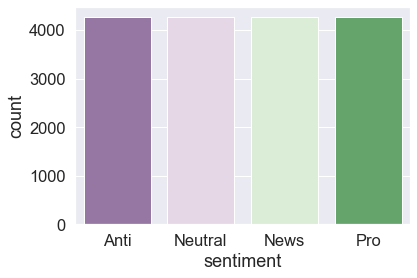

In [446]:
# Checking if data has been well-balanced
sns.countplot(x = res_df['sentiment'], data = data, palette='PRGn')

plt.show()

The equal distribution of the sentiments as shown on the count plot, confirms that sentiments are now balanced.

## Training with balanced data

In [447]:
# Defining the features as well as the label
X1 = res_df['message']

# data cleaning
X_res= X1.apply(clean_text) 

X_res = X1.apply(strip_accents)

X_res= X1.apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))


y_res = res_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

 ####  using Logistic regression on the balanced data 

In [448]:
lr_B = LogisticRegression(C=1, class_weight='balanced', max_iter=1000) # initilising the model

clf_lr_B = Pipeline([('tfidf', tfidf), ('clf', lr_B)]) # Create a pipeline

clf_lr_B.fit(X_train, y_train) # Fit the training data to the pipeline

y_pred_lr_B = clf_lr_B.predict(X_test) # Make predictions

print('accuracy %s' % accuracy_score(y_pred_lr_B, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_lr_B,average='weighted')) # Print the weighted f1 score

print(classification_report(y_test, y_pred_lr_B)) # Print out the classification report

accuracy 0.8311840562719812
f1_score 0.8260159466787268
              precision    recall  f1-score   support

        Anti       0.93      0.95      0.94      1076
     Neutral       0.77      0.90      0.83      1074
        News       0.82      0.88      0.85      1079
         Pro       0.80      0.59      0.68      1036

    accuracy                           0.83      4265
   macro avg       0.83      0.83      0.82      4265
weighted avg       0.83      0.83      0.83      4265



####  using Linear SVC classification on the balanced data 
     

In [449]:
lsvc_B = LinearSVC(random_state=42) # initilising the model

clf_lsvc_B = Pipeline([('tfidf', tfidf), ('clf', lsvc_B)]) # Create a pipeline

clf_lsvc_B.fit(X_train, y_train) # fitting the training dataset

y_pred_lsvc_B = clf_lsvc_B.predict(X_test) # making the predictions

print('accuracy %s' % accuracy_score(y_pred_lsvc_B, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_lsvc_B,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_lsvc_B)) # Print out the classification report

accuracy 0.8347010550996483
f1_score 0.8291847303899185
              precision    recall  f1-score   support

        Anti       0.93      0.96      0.94      1076
     Neutral       0.77      0.91      0.83      1074
        News       0.83      0.87      0.85      1079
         Pro       0.81      0.59      0.68      1036

    accuracy                           0.83      4265
   macro avg       0.84      0.83      0.83      4265
weighted avg       0.84      0.83      0.83      4265



####  using K-NN Classification on the balanced data

In [423]:
knn_B = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) # initilising the model

clf_knn_B = Pipeline([('tfidf', tfidf), ('clf', knn_B)]) # Create a pipeline

clf_knn_B.fit(X_train, y_train) # fitting the training dataset

y_pred_knn_B = clf_knn_B.predict(X_test) # making the predictions

print('accuracy %s' % accuracy_score(y_pred_knn_B, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_knn_B,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_knn_B)) # Print out the classification report

accuracy 0.6769050410316529
f1_score 0.668087070834192
              precision    recall  f1-score   support

        Anti       0.65      0.82      0.72      1076
     Neutral       0.61      0.73      0.66      1074
        News       0.79      0.74      0.77      1079
         Pro       0.69      0.41      0.51      1036

    accuracy                           0.68      4265
   macro avg       0.68      0.67      0.67      4265
weighted avg       0.68      0.68      0.67      4265



####  using Naïve Bayes on the balanced data

In [424]:
nb_B = MultinomialNB() # initilising the model

clf_nb_B= Pipeline([('tfidf', tfidf), ('clf', nb_B)]) # Create a pipeline

clf_nb_B.fit(X_train, y_train) # fitting the training dataset

y_pred_nb_B = clf_nb_B.predict(X_test) # making the predictions

print('accuracy %s' % accuracy_score(y_pred_nb_B, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb_B,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_nb_B)) # Print out the classification report

accuracy 0.7920281359906214
f1_score 0.7900822421934516
              precision    recall  f1-score   support

        Anti       0.77      0.93      0.84      1076
     Neutral       0.84      0.74      0.79      1074
        News       0.85      0.83      0.84      1079
         Pro       0.71      0.67      0.69      1036

    accuracy                           0.79      4265
   macro avg       0.79      0.79      0.79      4265
weighted avg       0.79      0.79      0.79      4265



####  using Random Forest Classifier on the balanced data

In [425]:
rf_B = RandomForestClassifier(max_depth=5, n_estimators=100) # initilising the model

clf_rf_B = Pipeline([('tfidf', tfidf), ('clf', rf_B)]) # Create a pipeline

clf_rf_B.fit(X_train, y_train) # fitting the training dataset

y_pred_rf_B = clf_rf_B.predict(X_test) # making the predictions

print('accuracy %s' % accuracy_score(y_pred_rf_B, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_rf_B,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_rf_B)) # Print out the classification report

accuracy 0.5524032825322391
f1_score 0.5448679087419432
              precision    recall  f1-score   support

        Anti       0.77      0.42      0.54      1076
     Neutral       0.55      0.49      0.52      1074
        News       0.52      0.83      0.64      1079
         Pro       0.48      0.47      0.48      1036

    accuracy                           0.55      4265
   macro avg       0.58      0.55      0.54      4265
weighted avg       0.58      0.55      0.54      4265



<a id="tuning"></a>
# 6. Model Parameter Tuning

### 6.1 Tune the lsvc model using GridSearch

In [29]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.75, min_df=2, ngram_range=(1, 2))),
    ('clf', LinearSVC(random_state=42))])

parameters = {'clf':[LinearSVC(random_state = 42)],
           'clf__penalty':['l1','l2'],
           'clf__C':[0.1, 1, 10, 100],
           'clf__multi_class':['ovr', 'crammer_singer'],
           'clf__class_weight':['balanced',None]}

grid_search_tune = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.73463527 0.63651005 0.63651005        nan 0.72971843
 0.71173762 0.71173762        nan 0.74727838 0.73035087 0.73035087
        nan 0.75114121 0.74776958 0.74776958        nan 0.73280881
 0.72704922 0.72704922        nan 0.73330043 0.72810279 0.72810279
        nan 0.72100856 0.71841017 0.71841017        nan 0.72065751
 0.71679449 0.71679449]
  category=UserWarning


Best parameters set:
[('tfidf', TfidfVectorizer(max_df=0.75, min_df=2, ngram_range=(1, 2))), ('clf', LinearSVC(C=1, random_state=42))]


In [30]:


y_pred_grid = grid_search_tune.predict(X_test) # predict and assess


print('accuracy %s' % accuracy_score(y_pred_grid, y_test)) # Print the accuracy

print('f1_score %s' % metrics.f1_score(y_test,y_pred_grid,average='weighted')) # Print the f1 score

print(classification_report(y_test, y_pred_grid)) # Print out the classification


accuracy 0.7838179519595448
f1_score 0.7745504128646695
              precision    recall  f1-score   support

          -1       0.76      0.54      0.63       126
           0       0.65      0.45      0.53       224
           1       0.81      0.89      0.85       895
           2       0.78      0.82      0.80       337

    accuracy                           0.78      1582
   macro avg       0.75      0.67      0.70      1582
weighted avg       0.78      0.78      0.77      1582



Saving our model on comet

In [31]:
'''
# Saving each metric to add to a dictionary for logging
f1 = f1_score(y_test, y_pred_grid, average='weighted')
precision = precision_score(y_test, y_pred_grid, average='weighted')
recall = recall_score(y_test, y_pred_grid, average='weighted')

# Create dictionaries for the data we want to log          
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision}

params= {'classifier': 'linear SVC',
         'max_df': 0.75,
         'min_df': 2,
         'ngram_range': '(1,2)',
         'vectorizer': 'Tfidf',
         'scaling': 'no',
         'resampling': 'no',
         'test_train random state': '42'}
  
# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()
'''

'\n# Saving each metric to add to a dictionary for logging\nf1 = f1_score(y_test, y_pred_grid, average=\'weighted\')\nprecision = precision_score(y_test, y_pred_grid, average=\'weighted\')\nrecall = recall_score(y_test, y_pred_grid, average=\'weighted\')\n\n# Create dictionaries for the data we want to log          \nmetrics = {"f1": f1,\n           "recall": recall,\n           "precision": precision}\n\nparams= {\'classifier\': \'linear SVC\',\n         \'max_df\': 0.75,\n         \'min_df\': 2,\n         \'ngram_range\': \'(1,2)\',\n         \'vectorizer\': \'Tfidf\',\n         \'scaling\': \'no\',\n         \'resampling\': \'no\',\n         \'test_train random state\': \'42\'}\n  \n# Log info on comet\nexperiment.log_metrics(metrics)\nexperiment.log_parameters(params)\n\n# End experiment\nexperiment.end()\n\n# Display results on comet page\nexperiment.display()\n'

<a id="evaluation"></a>
# 7. Performance Evaluation

Accuracy is not always the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

1. Confusion Matrix: table shows correct predictions and types of incorrect predictions.
2. Precision: the number of true positives divided by all positive predictions. 
3. Recall: the number of true positives divided by the number of positive values in the test data. 
4. F1: Score: the weighted average of precision and recall.

### Best performing models
#### Linear SVC classifier for balanced data

Text(61.5, 0.5, 'Actual')

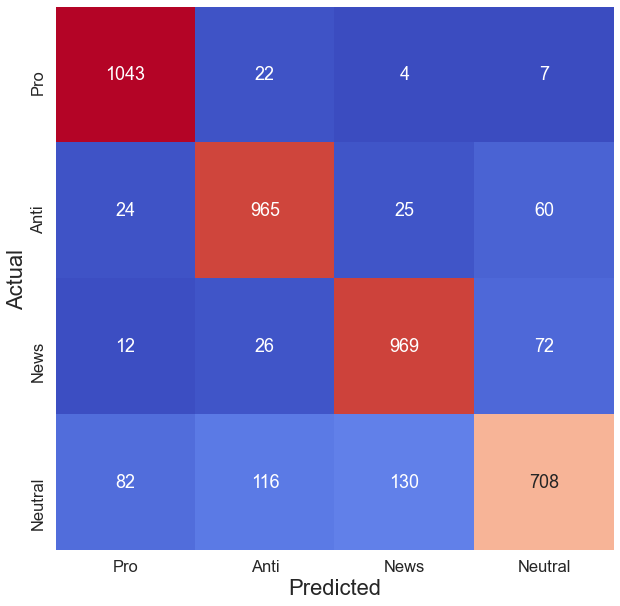

In [426]:
# column names
new = list(set(res_df.sentiment.values))

# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_lsvc_B )
conf_matrix_df = pd.DataFrame(conf_matrix,columns=new,index=new)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')

# font size
sns.set(font_scale=1.5)

# the actual heatmap
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)

# x axis label
plt.xlabel('Predicted',fontsize=22)

# y axis label
plt.ylabel('Actual',fontsize=22)

#### Linear SVC classifier for imbalanced data

Text(61.5, 0.5, 'Actual')

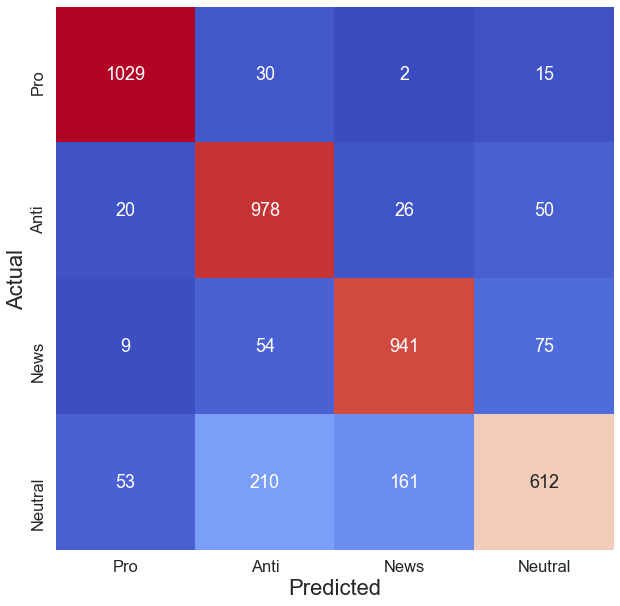

In [452]:
# column names
new = list(set(df_all.sentiment.values))

# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_lsvc )
conf_matrix_df = pd.DataFrame(conf_matrix,columns=new,index=new)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')

# font size
sns.set(font_scale=1.5)

# the actual heatmap
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)

# x axis label
plt.xlabel('Predicted',fontsize=22)

# y axis label
plt.ylabel('Actual',fontsize=22)

Observations:
Linear SVC is able to successfully classify the tweets.
This model classifies most tweets successfully with clear boundaries and less confusion surrounding the pro climate change class compared to the first 3 models.
This model shows a higher degree of confusion surrounding the Neutral class. Since about 53 tweets from the Neutral group were classified as Pro and 210 were classified as Anti and 161 were News this is because people from the neutral group can easily mistaken with all the groups since they normally tweet general things.
This, however, leads to an increase in the precision, accuracy and f1 score for the pro class which makes up the majority of the tweets.
Linear SVC has achieved the highest F1 score of 

<a id="submission"></a>
# 8. Submission

In [453]:
# making predictions to the test dataset
y_test_pred_lsvc= clf_lsvc.predict(df_test['message'])

# preparng our predictions for submissions
prediction_lsvc = pd.DataFrame({'tweetid':df_test['tweetid'],
                          'sentiment':y_test_pred_lsvc})

prediction_lsvc


,tweetid,sentiment
0,169760,Pro
1,35326,Pro
2,224985,Pro
3,476263,Pro
4,872928,Neutral
...,...,...
10541,895714,Pro
10542,875167,Pro
10543,78329,Neutral
10544,867455,Neutral


##### Converting the sentiments back to numericals.

In [456]:
def return_sentiment(df):  
    """This function turns the sentiment codes back into numbers for submission"""
    
    # creating a empty list for storage 
    sentiment_list = []
    
    # Going through each sentiment and changing them accordingly, this is what this loop and the if statements do.
    for number in df['sentiment'] :
        
        if number == 'Pro'  :
            sentiment_list.append(1)
            
        elif number == 'Neutral' :
            sentiment_list.append(0)
            
        elif number == 'Anti' :
            sentiment_list.append(-1)
            
        else :
            sentiment_list.append(2)
            
    # putting our sentiments in the column named 'sentiment' to our dataframe
    prediction_lsvc['sentiment'] = sentiment_list
    
    return df

In [457]:
return_sentiment(prediction_lsvc)


,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,0
10544,867455,0


##### Saving the submission file

In [458]:
prediction_lsvc_B.to_csv('classification_lsvc2.csv',index=False)

<a id="conclusion"></a>
# 9. Conclusion

More than half of the tweets examined support the beilief of man-made climate change. Futhermore, climate change is now one of the two most important issues in politics for Democrats. The data also suggests that the majority of anti climate change tweets come from Republicans and Trump supporters.

We noticed that the majority of tweets about climate change accross all classes involve the Paris agreement, COP22, Trump and Trump related hashtags/mentions. It was intresting to note that the most links are being shared in the News climate change class and not in any other related class, as we would have expected news to share more source of information to the public.

Our final kaggle subission made use of a tuned linear SVC model and achived an F1 score of 0.75343

For further information regarding the possible business applications of these insights and as well as access to our interactive classification model and data visualizations please visit our streamlit app:

Link: http://52.49.254.129:5000/

<a id="references"></a>
# 10. References

1. Comet related information: https://www.comet.ml/docs/python-sdk/scikit/

2. Scott morrison's comments: https://www.theguardian.com/business/grogonomics/2020/jan/22/scott-morrisons-stance-on-climate-change-makes-it-harder-for-future-governments-to-undo-his-damage

3. Barack Obama's comments: https://unfccc.int/news/president-obama-climate-change-greatest-threat-to-future-generations

4. Information about the AMP: https://supportingcommunities.org/latest-news/2021/5/18/survey-results-the-amp-on-climate-change-amp-household-energy

5. Some of the codes are from GitHub: https://github.com/